# Exercise 2: LEGO-optimizing-mixing-utilisation-Bayesian-optimizer

In [1]:
try:
    from dragonfly import minimize_function
    from argparse import Namespace
    from scipy.optimize import minimize
    import numpy as np
    from IPython import display
    import matplotlib.pyplot as plt
    from plot_pie_charts import make_piechart_plot
    from ailego_master import AiLEGO_master
    from silico_color_mixer import SilicoColorMixer
    from pathlib import Path
    from make_savefile import make_dragonfly_save_file
except:
    print('Have you completed the other notebooks?')

In [2]:
#mixer = SilicoColorMixer(target=(246., 199., 30.))
mixer = AiLEGO_master(colors=['red_u', 'green_u', 'blue_t', 'yellow_u'])

Input robot nameailego2
Robot password:········
Verify that syringe is at the top positon and the plunger fully pressed. Then press ENTER
Verify that color cartridges are filled and cuvettes empty (#5 can be filled). Then press ENTER
Do you want to test positions? (y/n): y
Are positions okay? (y/n): n
Specify offset: 0.1
Are positions okay? (y/n): y


In [3]:
from pathlib import Path
home = str(Path.home())

options = Namespace(init_capital=9, build_new_model_every=9, report_results_every=9,
                    progress_load_from_and_save_to=home + '/47332/data/robot_data', progress_save_every=3)

In [4]:
import math

data = []
data_pie = []
func_calls=[0]
mixer.set_first_empty_cuvette(1)

In [5]:
def rserr(input_color1, input_color2):
    r1, g1, b1 = input_color1[0], input_color1[1], input_color1[2]
    r2, g2, b2 = input_color2[0], input_color2[1], input_color2[2]
    rserr = math.sqrt((r1-r2)**2 + (g1-g2)**2 + (b1-b2)**2)
    return rserr

In [6]:
def find_color(color_list, func_calls=func_calls):  
    color, target = mixer.run_cuvette(color_list, read_target=True)
    score = rserr(color, target)
    data.append([score, color])
    print('color', color,'target',target,'input',color_list,'score',score)
    func_calls[0] += 1
    plt.axis('off')
    plt.imshow(np.array([[color, target]], dtype=np.uint8))
    data_pie.append([score,list(color_list)])
    make_piechart_plot(data_pie)
    if func_calls[0] % 9 == 0:
        #display.clear_output(wait=True) # This will help you remove figures as you go
        input('Have cuvettes other than #5 emptied. Then press Enter')
        # When LEGO - set the next cuvette to 1 here
        mixer.set_first_empty_cuvette(1)
    return score

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 100.0 (return_value)
Loaded 26 data from files ['/zhome/76/c/124557/47332/data/robot_data'].
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
color (38, 36, 54) target (76, 38, 51) input [0.99931413 0.54526749 0.25994513 0.99794239] score 38.17066936798463


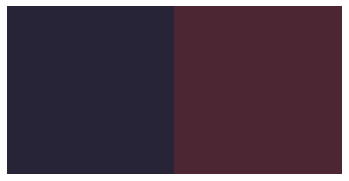

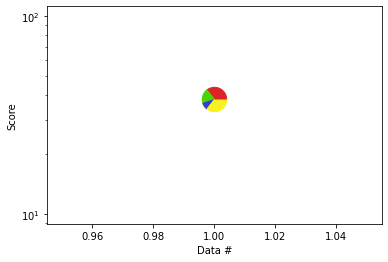

color (44, 42, 62) target (76, 34, 49) input [9.40838212e-07 3.13612737e-07 3.13612737e-07 9.40838212e-07] score 35.45419580247167


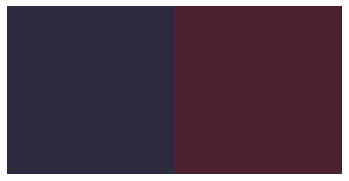

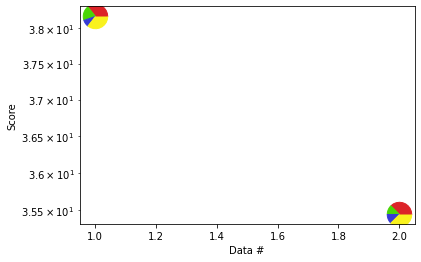

color (80, 44, 62) target (76, 37, 51) input [0.98148148 0.00617284 0.01851852 0.98148148] score 13.638181696985855


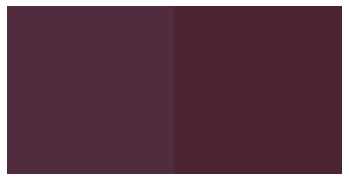

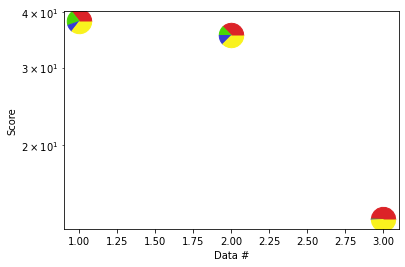

Saved 28 data to /zhome/76/c/124557/47332/data/robot_data.
color (43, 40, 54) target (77, 40, 51) input [9.99991532e-01 9.99991532e-01 6.20611695e-01 8.46754390e-06] score 34.132096331752024


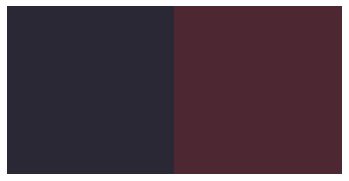

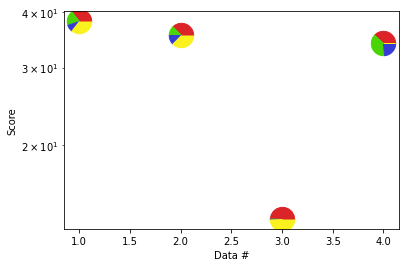

color (79, 45, 64) target (73, 40, 54) input [0.46296296 0.05555556 0.00617284 0.98148148] score 12.68857754044952


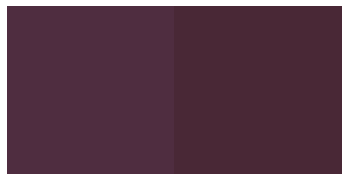

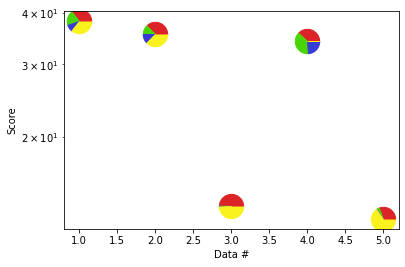

color (70, 33, 46) target (73, 28, 39) input [0.94444444 0.05555556 0.05555556 0.83333333] score 9.1104335791443


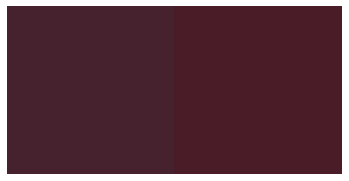

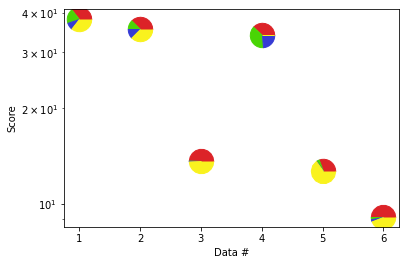

Saved 31 data to /zhome/76/c/124557/47332/data/robot_data.
color (36, 59, 57) target (79, 45, 62) input [2.28623685e-04 5.58984911e-01 2.39826246e-01 9.99314129e-01] score 45.4972526643093


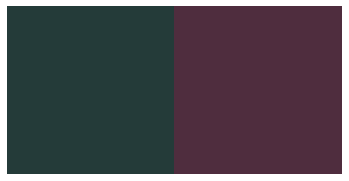

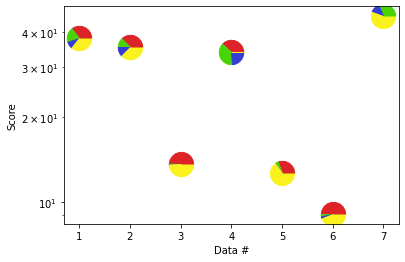

color (46, 62, 73) target (74, 37, 51) input [9.40838212e-07 9.99999059e-01 9.40838212e-07 9.40838212e-07] score 43.508619835614184


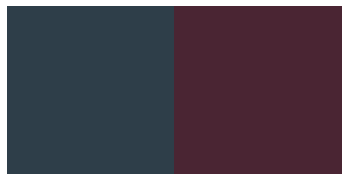

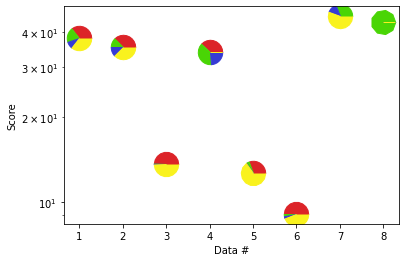

color (45, 35, 48) target (72, 29, 40) input [0.65939869 0.26680384 0.17215364 0.99977138] score 28.792360097775937


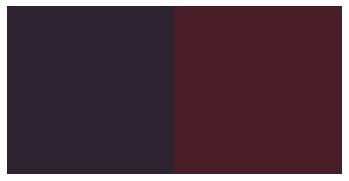

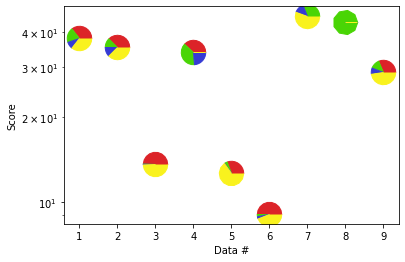

In [ ]:
function_bounds = [[0,1]]*4
max_func_calls = 100
min_val, min_pt, history = minimize_function(find_color, function_bounds, max_func_calls, options=options)
print(min_val, min_pt)